# Descripción
* En esta ocasión utilizaremos datos de la composición química de muestras de vino
* Nuestro propósito será tratar de predecir su calidad a partir de su composición química
* Comience su estudio realizando un breve análisis exploratorio y descriptivo:

# Ejercicio 1: Preparación del ambiente de trabajo
* Importe las librerías básicas

In [290]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from cv_error import *
plt.rcParams['figure.figsize'] = (10,12)
plt.style.use('seaborn-darkgrid')
from cv_error import *

* Importe los métodos asociados a regularización

In [195]:
# Métodos
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, median_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet, ElasticNetCV

* Importe la base de datos

In [196]:
df = pd.read_csv('winequality-red.csv')

# Ejercicio 2: Análisis Exploratorio

* Identifique el tipo de dato de cada columna

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


* Identifique outliers univariados y multivariados. Los primeros los puede encontrar realizando boxplots de cada atributo, los segundos estudiando los scatterplot entre pares de atributos

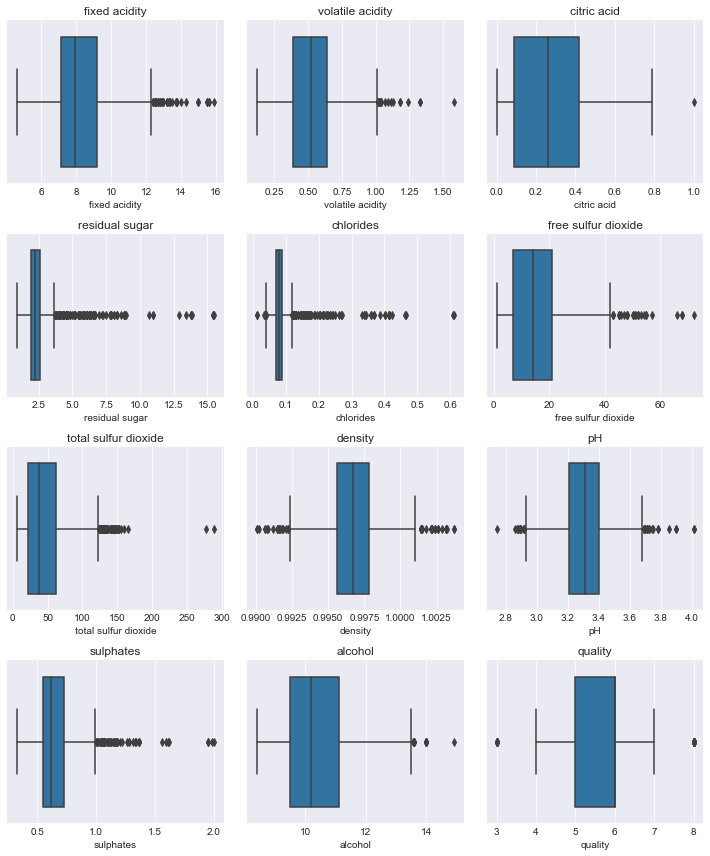

In [198]:
for i, columna in enumerate(df.columns):
    plt.subplot(4, 3, i + 1)
    plt.title(columna)
    sns.boxplot(df[columna])
    
plt.tight_layout()    

* Existen outliers en las columnas: citric acid, volatile acidity, residual sugar, chlorides, alcohol y quality.

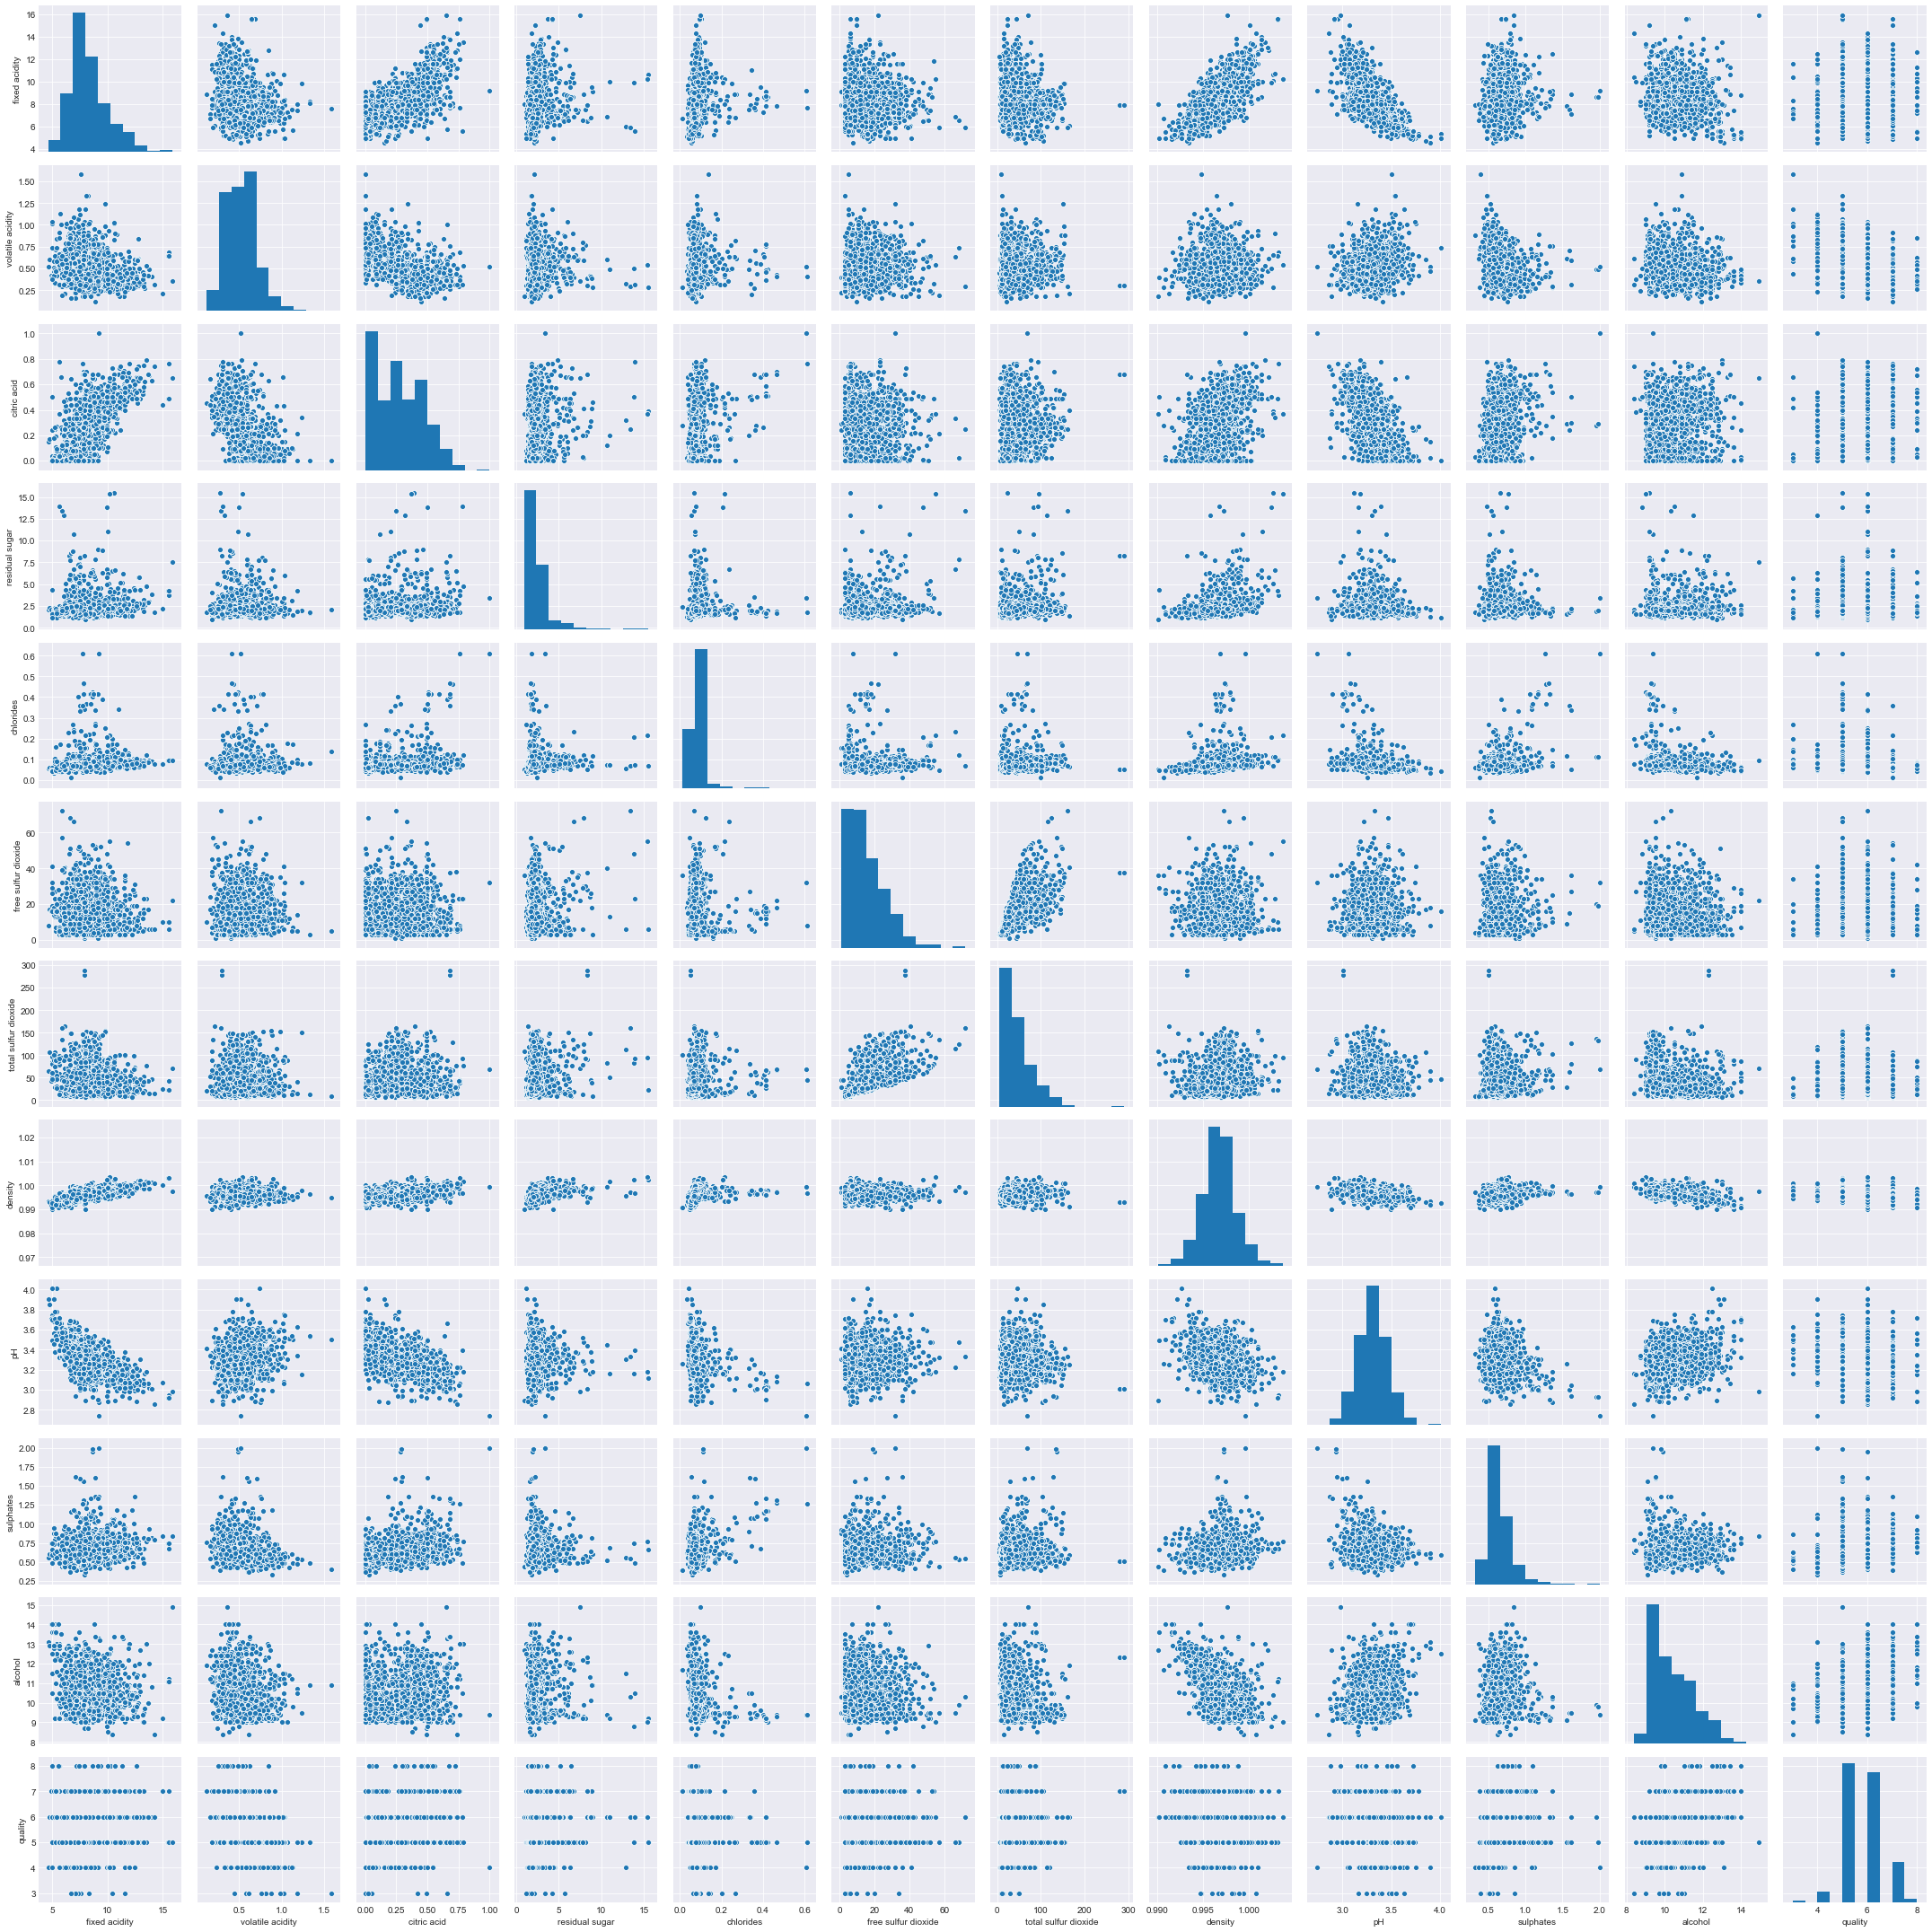

In [199]:
sns.pairplot(df)
plt.tight_layout()

# Ejercicio 3: Regularización de Modelos

* Genere 3 modelos, correspondientes a RidgeCV, LassoCV y ElasticNetCV. Para cada uno de ellos implemente los siguientes pasos:
        * Entrene los modelos con 10 validaciones cruzadas 
        * Extraiga los coeficientes estimados, el mejor valor alpha, MAE y RMSE asociado a cada modelo.
        * En base a la información solicitada, responda lo siguiente:
            * ¿Qué modelo presenta un mejor desempeño en base a las métricas?
            * ¿Qué atributos mantienen un comportamiento similar a lo largo de cada modelo?

## Escalamiento de las variables

In [200]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

## Separación de la data en entrenamiento y testing

In [201]:
X = df_scaled.iloc[:, :-1]
y = df_scaled['quality']

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=63)

In [202]:
# Verificar tamaño de las muestras
print(X_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1071, 11)
(528, 11)
(1071,)
(528,)


# Modelo RidgeCV

In [204]:
alphas = np.logspace(0, 7, base=10)

In [205]:
ridge_cv = RidgeCV(cv=10)
model_ridge = ridge_cv.fit(X_train, y_train)

## Mejor valor de alpha

In [206]:
model_ridge.alpha_

10.0

## Coeficientes del modelo

In [207]:
# Coeficientes del modelo
model_ridge.coef_

array([ 0.04991186, -0.2358053 , -0.0310285 ,  0.05404889, -0.15227714,
        0.05698916, -0.15354322, -0.07040457, -0.08263347,  0.19312578,
        0.33033053])

## Métricas

In [208]:
# Median Absolute Error

In [209]:
Ridge_mae = median_absolute_error(model_ridge.predict(x_test), y_test)
Ridge_mae

0.4971377529760591

In [210]:
# Mean squared Error

In [211]:
Ridge_rmse = np.sqrt(mean_squared_error(model_ridge.predict(x_test), y_test))
Ridge_rmse

0.8008332048930289

# Modelo LassoCV

In [212]:
alphas = np.logspace(0, -3, base=10)

In [213]:
lasso_cv = LassoCV(cv=10)
model_lasso = lasso_cv.fit(X_train, y_train)

## Mejor valor de alpha

In [214]:
model_lasso.alpha_

0.008907598045151842

## Coeficientes del modelo

In [215]:
# Coeficientes del modelo
model_lasso.coef_

array([ 0.        , -0.2275186 , -0.        ,  0.02842405, -0.1465553 ,
        0.03984327, -0.13377197, -0.02096103, -0.08292744,  0.17710137,
        0.35172213])

## Métricas

In [216]:
# Median Absolute Error

In [217]:
Lasso_mae = median_absolute_error(model_lasso.predict(x_test), y_test)
Lasso_mae

0.49867078831042394

In [218]:
# Mean squared Error

In [219]:
Lasso_rmse = np.sqrt(mean_squared_error(model_lasso.predict(x_test), y_test))
Lasso_rmse

0.7990535798777724

# Modelo ElasticNetCV

In [220]:
alphas = np.logspace(0, -3, base=10)

In [221]:
elastic_cv = ElasticNetCV(cv=10)
model_elastic_net = elastic_cv.fit(X_train, y_train)

## Mejor valor de alpha

In [222]:
model_elastic_net.alpha_

0.01661451149919808

## Coeficientes del modelo

In [223]:
# Coeficientes del modelo
model_elastic_net.coef_

array([ 0.        , -0.22694428, -0.        ,  0.0300214 , -0.14630521,
        0.03964603, -0.13402552, -0.0239462 , -0.08299067,  0.17711488,
        0.34801206])

## Métricas

In [224]:
# Median Absolute Error

In [300]:
ElasticNet_mae = median_absolute_error(model_elastic_net.predict(x_test), y_test)
ElasticNet_mae

0.4976719695716484

In [226]:
# Mean Squared Error

In [227]:
ElasticNet_rmse = np.sqrt(mean_squared_error(model_elastic_net.predict(x_test), y_test))
ElasticNet_rmse

0.7992167166518556

# Resúmen métricas de modelos

In [229]:
print("Modelo ElasticNetCV:")
print("El valor de MAE es: " + str(round(ElasticNet_mae,4)))
print("El valor de RMSE es: " + str(round(ElasticNet_rmse,4)))
print("\n") 
print("Modelo LassoCV:")
print("El valor de MAE es: " + str(round(Lasso_mae,4)))
print("El valor de RMSE es: " + str(round(Lasso_rmse,4)))
print("\n") 
print("Modelo RidgeCV:")
print("El valor de MAE es: " + str(round(Ridge_mae,4)))
print("El valor de RMSE es: " + str(round(Ridge_rmse,4)))

Modelo ElasticNetCV:
El valor de MAE es: 0.4977
El valor de RMSE es: 0.7992


Modelo LassoCV:
El valor de MAE es: 0.4987
El valor de RMSE es: 0.7991


Modelo RidgeCV:
El valor de MAE es: 0.4971
El valor de RMSE es: 0.8008


¿Qué modelo presenta un mejor desempeño en base a las métricas?

Podemos decir que el modelo que tiene mejor desempeño es el que presente menor valor de MAE y RMSE, si lo tomamos por el MAE elegiriamos el modelo Ridge y si lo eligieramos por el valor de RMSE elegiriamos el modelo Lasso.

In [251]:
model_elastic_net.coef_

array([ 0.        , -0.22694428, -0.        ,  0.0300214 , -0.14630521,
        0.03964603, -0.13402552, -0.0239462 , -0.08299067,  0.17711488,
        0.34801206])

In [252]:
model_ridge.coef_

array([ 0.04991186, -0.2358053 , -0.0310285 ,  0.05404889, -0.15227714,
        0.05698916, -0.15354322, -0.07040457, -0.08263347,  0.19312578,
        0.33033053])

In [253]:
model_lasso.coef_

array([ 0.        , -0.2275186 , -0.        ,  0.02842405, -0.1465553 ,
        0.03984327, -0.13377197, -0.02096103, -0.08292744,  0.17710137,
        0.35172213])

In [301]:
columnas = ['Ridge', 'Lasso', 'ElasticNet']
filas = df.columns.tolist()[0:11]

metricas = np.array([model_ridge.coef_, model_lasso.coef_, model_elastic_net.coef_])
metricas_df = pd.DataFrame(data=metricas.T, index=filas, columns=columnas)
metricas_df


,Ridge,Lasso,ElasticNet
fixed acidity,0.049912,0.000000,0.000000
volatile acidity,-0.235805,-0.227519,-0.226944
citric acid,-0.031028,-0.000000,-0.000000
residual sugar,0.054049,0.028424,0.030021
chlorides,-0.152277,-0.146555,-0.146305
free sulfur dioxide,0.056989,0.039843,0.039646
total sulfur dioxide,-0.153543,-0.133772,-0.134026
density,-0.070405,-0.020961,-0.023946
pH,-0.082633,-0.082927,-0.082991
sulphates,0.193126,0.177101,0.177115


¿Qué atributos mantienen un comportamiento similar a lo largo de cada modelo?

Los atributos que mantienen un comportamiento similar en los 3 modelos son: 'volatile acidity', 'chlorides', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol'.